<h1>HW4 by Hyomin Jeong</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a function to calculate the pdf of binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
import Pkg
Pkg.add("Distributions")
using Distributions

function binomial_p(n, k, p)
    binom_coeff = binomial(n, k)
    prob_success = p .^ k
    prob_failure = (1-p) .^ (n-k)
    return binom_coeff .* prob_success .* prob_failure
end

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


binomial_p (generic function with 1 method)

In [2]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [3]:
win1 = binomial_p(10, 5, 0.4)

0.20065812480000003

The chance of losing the bet:

In [4]:
lose1 = 1-binomial_p(10, 5, 0.4)

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [5]:
(win1 .* 30) + (lose1 .* -10)

-1.973675007999999

=> I am expecting to lose money because the expected outcome is negative.

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [6]:
win2 = binomial_p(10, 4, 0.4)
lose2 = 1 -binomial_p(10, 4, 0.4)
return win2, lose2

(0.250822656, 0.749177344)

In [7]:
(win2 .* 30) + (lose2 .* -10)

0.03290623999999909

=> I am expecting to earn money because the expected outcome is now positive.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [8]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [9]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [10]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

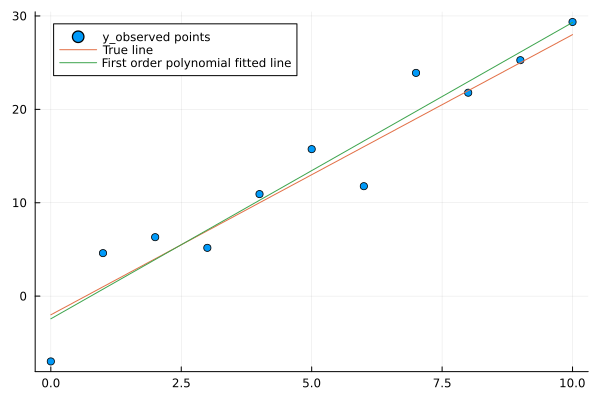

In [11]:
#1
poly_fit = Polynomials.fit(x, y_observed, 1)
y_fit = poly_fit.(x)
Plots.scatter(x, y_observed, label = "y_observed points")
Plots.plot!(x, y_true, label = "True line")
Plots.plot!(x, y_fit, label = "First order polynomial fitted line")

In [12]:
#2
fit_coeff = Polynomials.coeffs(poly_fit)

2-element Vector{Float64}:
 -2.427464455284886
  3.1733606182174583

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [13]:
function chisqr(b, m, x, y_observed, sigma)
    y_fit = m .* x .+ b
    residuals = (y_observed .- y_fit) ./ sigma
    chisq = sum(residuals .^ 2)
    return chisq
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [14]:
chi2_list = []
n = 10000

for i in 1:n
    x = 0:1:10
    y_true = 3 .* x .- 2
    sigma = 3
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    
    poly_fit = Polynomials.fit(x, y_observed, 1)
    fit_coeff = Polynomials.coeffs(poly_fit)
    
    chi = chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma)
    push!(chi2_list, chi)
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [15]:
mean_chi2 = mean(chi2_list)

8.999230824134797

=> The degrees of freedom is given as n - 2 for a first-order polynomial since there are two fitting parameters: the slope and intercept. Given that n = 11 for this case, the degree of freedom as approximately 9 makes sense.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [16]:
#1
df = mean_chi2
chisq_dist = Distributions.Chisq(df)

Chisq{Float64}(ν=8.999230824134797)

In [17]:
#2
x_dist = 0:0.1:30

0.0:0.1:30.0

In [18]:
#3
pdf_chi = Distributions.pdf.(chisq_dist, x_dist);

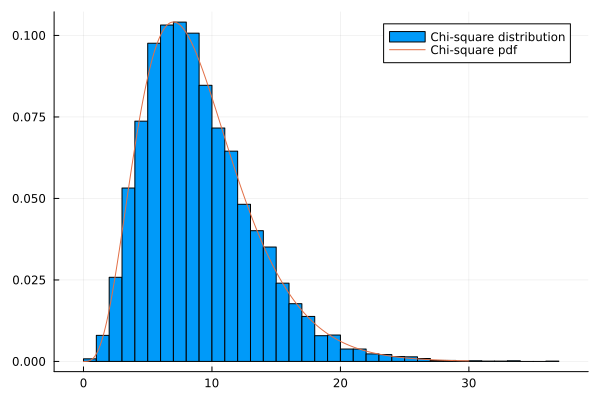

In [19]:
#4&5
Plots.histogram(chi2_list, bins=50, normalize=true, label="Chi-square distribution")
Plots.plot!(x_dist, pdf_chi, label="Chi-square pdf")

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [20]:
#1
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [21]:
#2&3
m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

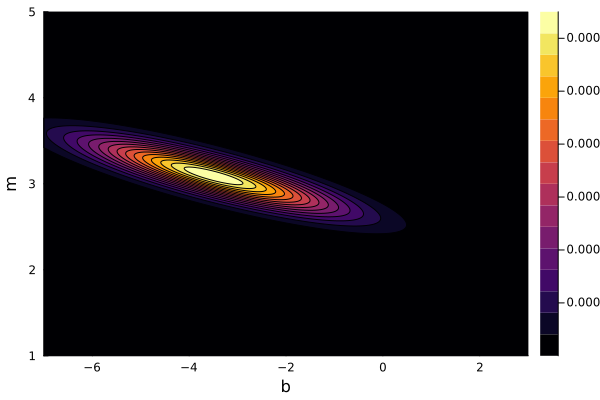

In [22]:
#4
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range, m_range, p_chi2poly, xlabel="b", ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

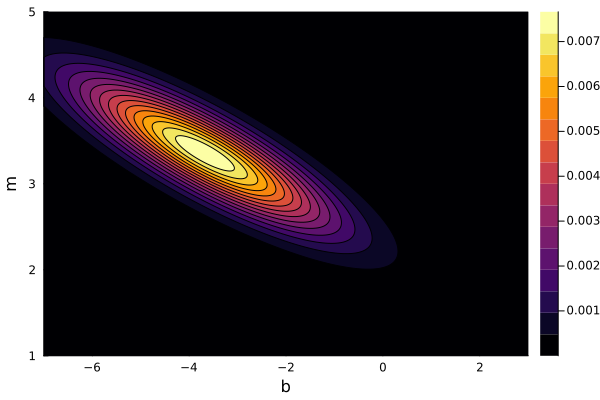

In [23]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range, m_range, p_chi2poly, xlabel="b", ylabel="m")

=> This contour is wider in m-axis than that of 2.6, which is caused by the smaller range of x; it is now harder to estimate the slope.

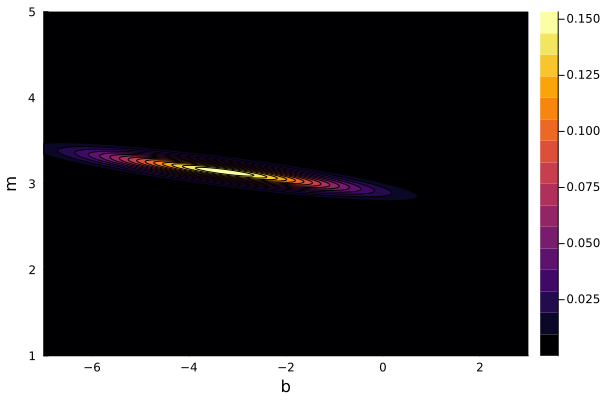

In [24]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range, m_range, p_chi2poly, xlabel="b", ylabel="m")

=> This version gives a more accurate estimation of the slope m with narrower distribution in m-axis because the range of x is now wider. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

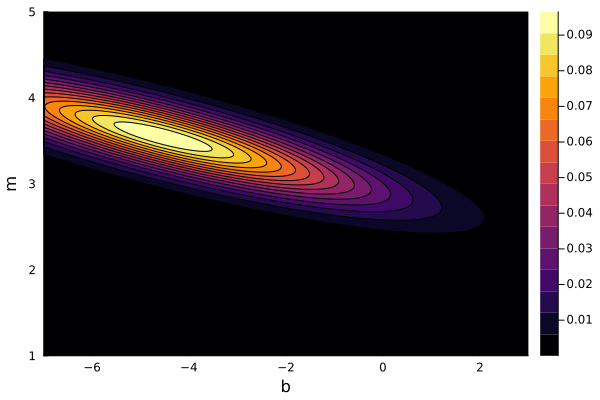

In [25]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range, m_range, p_chi2poly, xlabel="b", ylabel="m")

=> Sigma here represents the standard deviation of the noise added to the simulated data. Hence, with bigger sigma, the amount of noise in the data is increased, and thus wider distribution in both m- and b-axes.

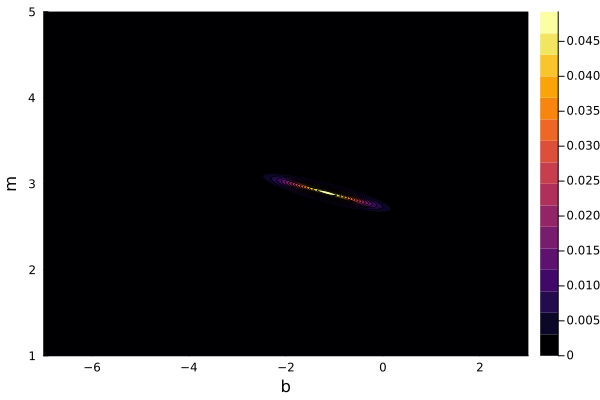

In [26]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
Plots.contourf(b_range, m_range, p_chi2poly, xlabel="b", ylabel="m")

=> With smaller sigma, the amount of noise in the data is decreased, and thus narrower distribution in both m- and b-axes.